In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
torch.__version__

'1.8.1+cu101'

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
batch_size = 16
learning_rate = 0.0002
num_epoch = 5

In [ ]:
mnist_train = dset.MNIST("/content/drive/MyDrive", train=True, transform=transforms.ToTensor(), target_transform=None, download=False)
mnist_test = dset.MNIST("/content/drive/MyDrive", train=False, transform=transforms.ToTensor(), target_transform=None, download=False)

In [ ]:
print(len(mnist_train))
print(len(mnist_test))

60000
10000


In [ ]:
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)

In [ ]:
print(len(train_loader))
print(len(test_loader))

3750
625


In [ ]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()   # 자식클래스에서 부모클래스의 내용을 사용하고 싶은 경우
    self.encoder = nn.Linear(28*28, 20)
    self.decoder = nn.Linear(20, 28*28)

  def forward(self, x):
    x = x.view(batch_size, -1)
    encoded = self.encoder(x)
    out = self.decoder(encoded).view(batch_size,1,28,28)

    return out

model = Autoencoder().cuda()

In [ ]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
loss_arr = []

for i in range(num_epoch):
  for j,[image,label] in enumerate(train_loader):
    x = image.cuda()

    optimizer.zero_grad()
    output = model.forward(x)
    loss = loss_func(output, x)
    loss.backward()
    optimizer.step()

    if j % 1000 == 0:
      print(loss)
      # loss_arr.append(loss.cpu().data.numpy())
      loss_arr.append(loss.cpu().data)
      print(loss_arr)

tensor(0.0265, device='cuda:0', grad_fn=<MseLossBackward>)
[tensor(0.0265)]
tensor(0.0258, device='cuda:0', grad_fn=<MseLossBackward>)
[tensor(0.0265), tensor(0.0258)]
tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward>)
[tensor(0.0265), tensor(0.0258), tensor(0.0244)]
tensor(0.0241, device='cuda:0', grad_fn=<MseLossBackward>)
[tensor(0.0265), tensor(0.0258), tensor(0.0244), tensor(0.0241)]
tensor(0.0214, device='cuda:0', grad_fn=<MseLossBackward>)
[tensor(0.0265), tensor(0.0258), tensor(0.0244), tensor(0.0241), tensor(0.0214)]
tensor(0.0245, device='cuda:0', grad_fn=<MseLossBackward>)
[tensor(0.0265), tensor(0.0258), tensor(0.0244), tensor(0.0241), tensor(0.0214), tensor(0.0245)]


KeyboardInterrupt: ignored

In [ ]:
print(loss_arr)

[tensor(0.0230, grad_fn=<CopyBackwards>), tensor(0.0209, grad_fn=<CopyBackwards>)]


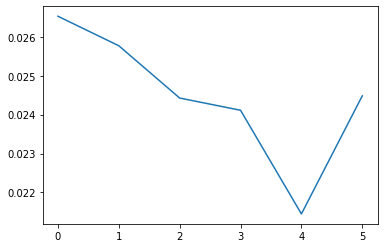

In [ ]:
plt.plot(loss_arr)
plt.show()

torch.Size([16, 28, 28])


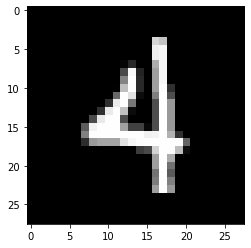

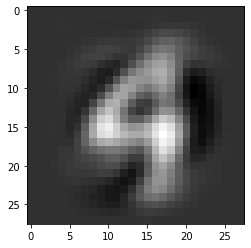

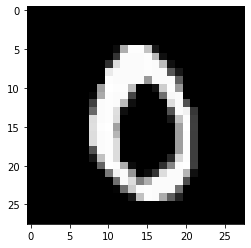

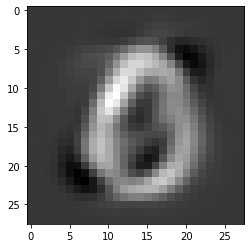

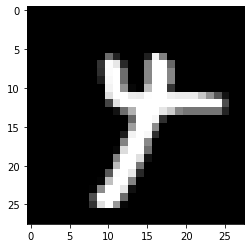

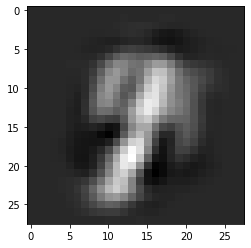

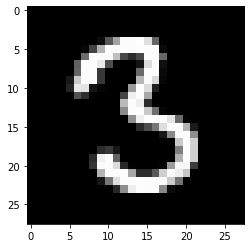

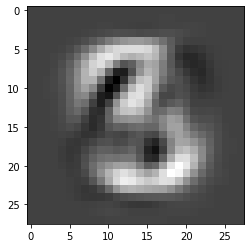

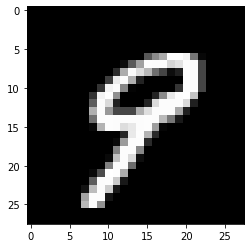

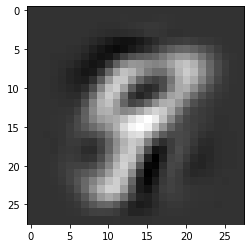

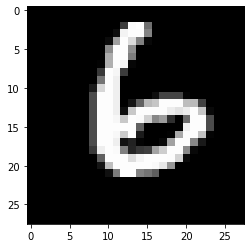

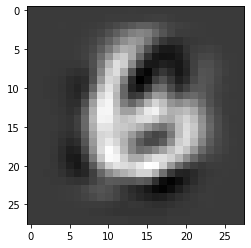

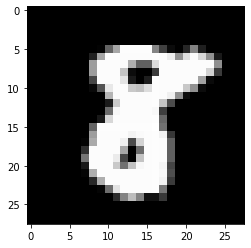

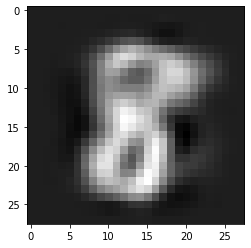

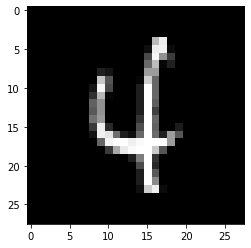

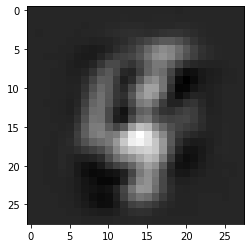

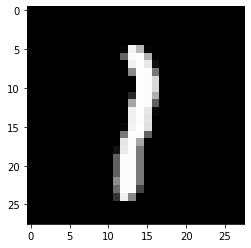

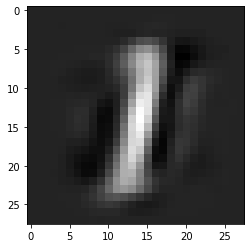

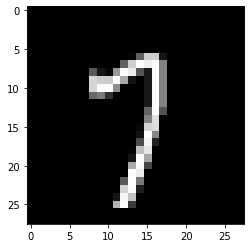

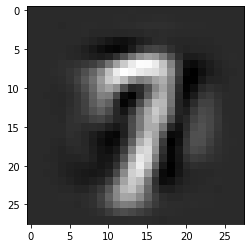

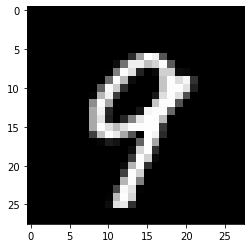

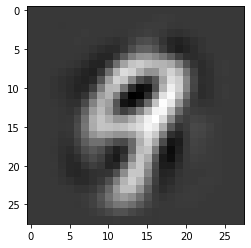

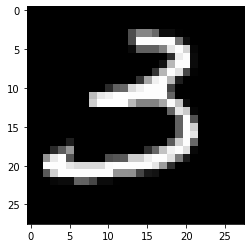

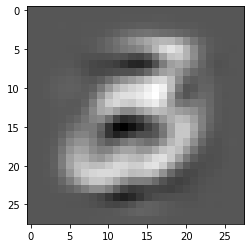

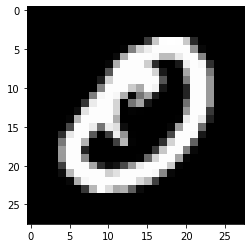

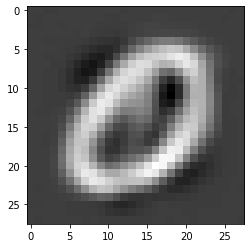

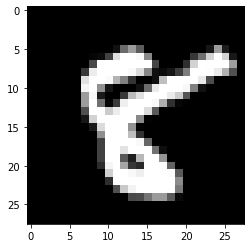

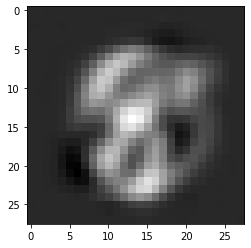

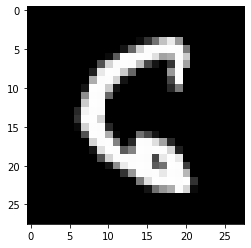

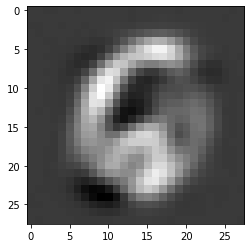

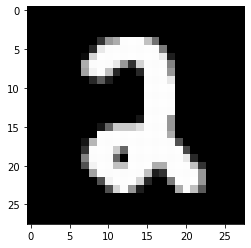

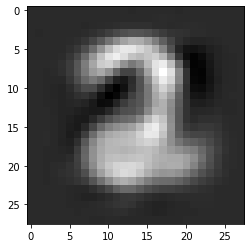

In [ ]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(out_img.size()[0]):
  plt.imshow(torch.squeeze(image[i]).numpy(), cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(), cmap='gray')
  plt.show()

In [ ]:
for i in range(1):
  for j,[image,label] in enumerate(test_loader):
    x = image.cuda()

    # optimizer.zero_grad()
    output = model.forward(x)
    # loss = loss_func(output, x)
    # loss.backward()
    # optimizer.step()

    break

    if j % 1000 == 0:
      print(loss)

torch.Size([16, 28, 28])


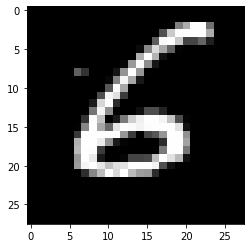

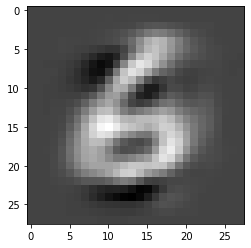

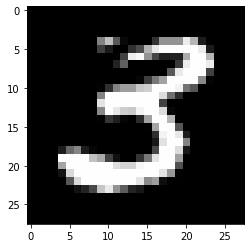

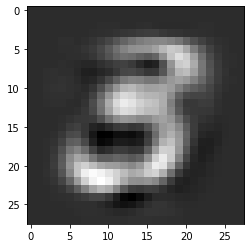

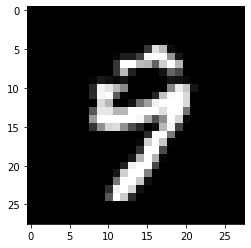

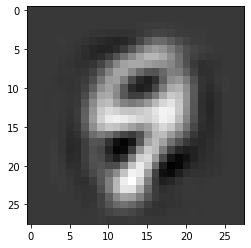

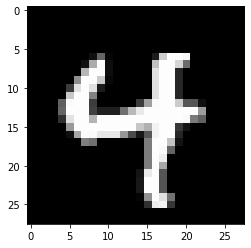

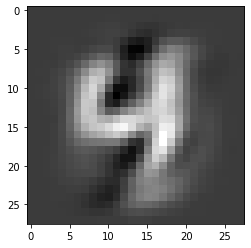

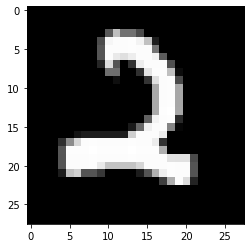

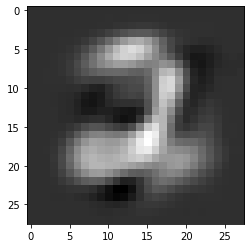

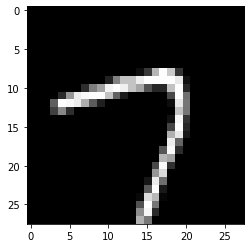

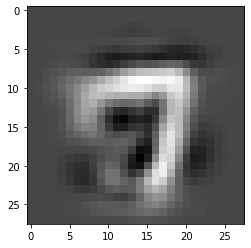

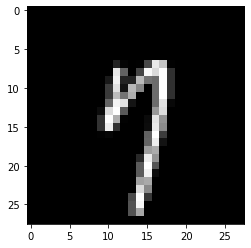

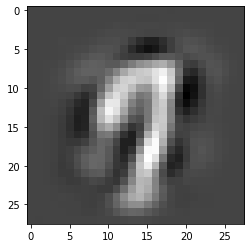

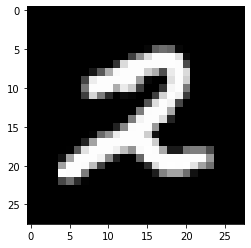

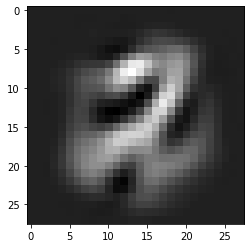

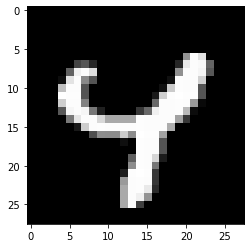

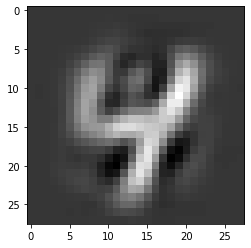

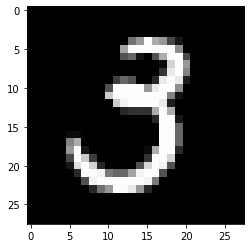

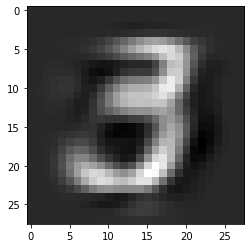

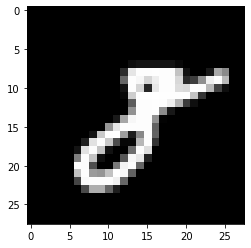

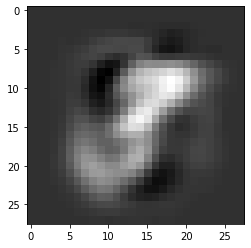

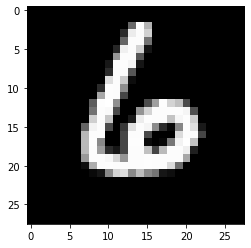

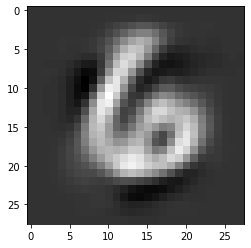

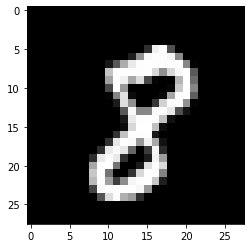

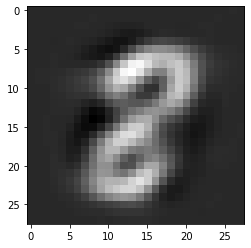

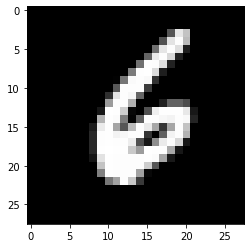

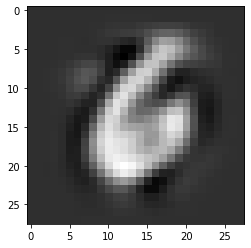

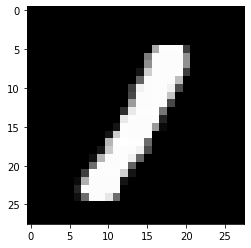

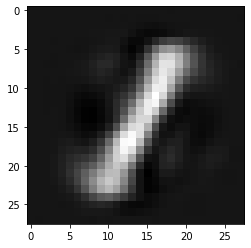

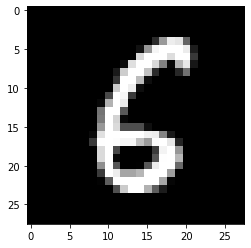

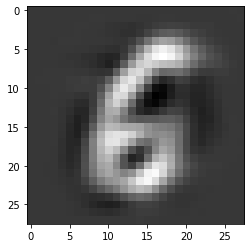

In [ ]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(out_img.size()[0]):
  plt.imshow(torch.squeeze(image[i]).numpy(), cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(), cmap='gray')
  plt.show()